In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
!pwd
lookup.LUType = lookup.LUType.astype(int)
lookup.LUItem = lookup.LUItem.astype(int)

/Users/ethan/FlatironTasks/phase_2/project_2/project_2_stuff/notebooks/exploratory


In [ ]:
lookup[lookup['LUType'] == ]

In [2]:
rp_sale = pd.read_csv('../../data/raw/EXTR_RPSale.csv', dtype=str)
res_bldg = pd.read_csv('../../data/raw/EXTR_ResBldg.csv', dtype=str)
parcel = pd.read_csv('../../data/raw/EXTR_Parcel.csv', dtype=str)
lookup = pd.read_csv('../../data/raw/EXTR_LookUp.csv', dtype=str)



In [6]:
df = pd.merge(pd.merge(rp_sale, parcel, on=['Major', 'Minor']), res_bldg, on=['Major', 'Minor'])
df

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,2743355,638580,0110,07/14/2015,190000,20150715002686,,,,,...,1,0,1,1963,0,0,0,0,3,0
1,2743356,638580,0110,07/14/2015,0,20150715002687,,,,,...,1,0,1,1963,0,0,0,0,3,0
2,2772937,638580,0110,12/21/2015,338000,20151222002066,,,,,...,1,0,1,1963,0,0,0,0,3,0
3,2841697,894677,0240,12/21/2016,818161,20161228000896,,,,,...,0,0,0,2016,0,0,0,0,3,0
4,3024468,894677,0240,12/05/2019,0,20191209000162,,,,,...,0,0,0,2016,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251295,2997920,302300,0320,05/01/2019,0,20190705000539,,,,,...,0,0,0,2011,0,0,0,0,3,6000
251296,3028691,277110,4239,12/19/2019,955000,20200103000685,,,,,...,0,0,0,2019,0,80,0,0,3,0
251297,2935450,219331,0270,06/07/2018,850000,20180612000762,,,,,...,1,0,0,1984,0,0,0,0,3,0
251298,2942886,886030,0550,07/16/2016,900000,20180720000629,,,,,...,1,0,1,1975,0,0,0,0,3,0


In [7]:
df['SalePrice'].fillna(0, inplace=True)
df['SalePrice'] = df['SalePrice'].astype(int)
df = df[df['SalePrice'] > 0]
df = df[df['SalePrice'] < 2000000]
# First step of cleaning, drop all null values and outliers SalePrices


In [19]:
df.columns.to_list()

['ExciseTaxNbr',
 'Major',
 'Minor',
 'DocumentDate',
 'SalePrice',
 'RecordingNbr',
 'Volume',
 'Page',
 'PlatNbr',
 'PlatType',
 'PlatLot_x',
 'PlatBlock_x',
 'SellerName',
 'BuyerName',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFForestLand',
 'AFCurrentUseLand',
 'AFNonProfitUse',
 'AFHistoricProperty',
 'SaleReason',
 'PropertyClass',
 'SaleWarning',
 'Unnamed: 0',
 'PropName',
 'PlatName',
 'PlatLot_y',
 'PlatBlock_y',
 'Range',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'SpecArea',
 'SpecSubArea',
 'DistrictName',
 'LevyCode',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Unbuildable',
 'MtRainier',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'OtherView',
 'WfntLocat

I choose which features could possibly be effecting SalePrice.

In [8]:
Categoricals = ['PlatType', 'PropertyType', 'StreetSurface', 'BldgGrade', 'NbrLivingUnits','SeismicHazard'
               , 'TrafficNoise', 'PropertyClass', 'SaleReason']
Continuous = ['SqFtLot', 'SqFtFstFloor', 'SqFtTotLiving', 'SqFtTotBasement', 'SalePrice', 'Area', 'Bedrooms'
             , 'YrBuilt', 'BathFullCount', 'BathHalfCount']
Percents = ['PcntComplete', 'PcntUnusable']

In [9]:
df.rename(columns={'SqFt1stFloor' : 'SqFtFstFloor'}, inplace=True)
# df.head()

Functions for transforming data and changing continous variables to ints and floats.

In [10]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
def min_max(feature):
    return (feature - min(feature))/(max(feature)-min(feature))

for vari in Continuous:
    df[vari].fillna(0, inplace=True)
    df[vari] = df[vari].astype(int)
    
for vari in Percents:
    df[vari].fillna(0, inplace=True)
    df[vari] = df[vari].astype(float)


Dropped all values of 0 for all continous variables.

In [11]:
for vari in Continuous:
    df = df[df[vari] > 0]
# df.dropna(inplace=True)

Transforms the data to normalize the functions in an attempt to make a better model.

In [13]:
df_cat = df[Categoricals]

In [14]:
df_cont = df[Continuous]
log_names = [f'{column}_log' for column in df_cont.columns]
df_log = np.log(df_cont)
df_log.columns = log_names
df_log_norm = df_log.apply(normalize)
percents_norm = df[Percents].apply(min_max)
df_ohe = pd.get_dummies(df[Categoricals], prefix=Categoricals, drop_first=True)
preprocessed = pd.concat([df['Major'], df['Minor'], df['SalePrice'], df_log_norm,
                          percents_norm, df[Categoricals]], axis=1)
cont_processed = pd.concat([df['SalePrice'], df_log_norm], axis=1)
preprocessed

,Major,Minor,SalePrice,SqFtLot_log,SqFtFstFloor_log,SqFtTotLiving_log,SqFtTotBasement_log,SalePrice_log,Area_log,Bedrooms_log,...,PcntUnusable,PlatType,PropertyType,StreetSurface,BldgGrade,NbrLivingUnits,SeismicHazard,TrafficNoise,PropertyClass,SaleReason
0,638580,0110,190000,0.478043,-0.008028,-0.145665,0.411231,-1.449880,-0.309343,0.557558,...,0.0,,3,1,7,1,N,0,8,1
2,638580,0110,338000,0.478043,-0.008028,-0.145665,0.411231,-0.767285,-0.309343,0.557558,...,0.0,,3,1,7,1,N,0,8,1
29,175070,0050,812000,0.002005,0.707846,-0.241195,1.129447,0.271328,-0.756620,0.557558,...,0.0,,11,1,7,1,N,0,8,1
31,168940,0110,1190900,-0.523350,-0.525560,-0.192973,-0.006437,0.725147,-1.073968,0.557558,...,0.0,,3,1,8,1,N,0,8,1
32,168940,0110,1553000,-0.523350,-0.525560,-0.192973,-0.006437,1.039744,-1.073968,0.557558,...,0.0,,11,1,8,1,N,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251268,262505,9302,950000,-0.399686,-0.029163,0.399424,0.450711,0.457330,0.823165,0.557558,...,0.0,,3,1,9,1,N,0,8,1
251278,322607,9085,828130,2.583835,1.748683,0.088975,2.087989,0.294637,0.871484,-0.509816,...,0.0,,11,1,9,1,N,0,8,1
251283,401440,0285,613000,0.945512,0.388613,1.527137,-0.248632,-0.061822,-0.179414,0.557558,...,0.0,,3,1,10,1,N,0,8,1
251296,277110,4239,955000,-1.160313,-1.025954,-0.538155,-1.408667,0.463551,-1.169952,-0.509816,...,0.0,,10,1,9,1,N,0,8,1


In [59]:
# preprocessed.to_csv('../../data/processed/processeddata.csv', index=False)

In [27]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [25]:
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        print('current score:', current_score)
        
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        print('Best New Score:', best_new_score)
        
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else:
            break
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [26]:
model = forward_selected(preprocessed.drop(['SalePrice', 'Major', 'Minor'], axis=1), 'SalePrice_log')

current score: 0.0
Best New Score: 0.09791695066652506
current score: 0.09791695066652506
Best New Score: 0.15361611863656877
current score: 0.15361611863656877
Best New Score: 0.18419013217719915
current score: 0.18419013217719915
Best New Score: 0.21050514989680957
current score: 0.21050514989680957
Best New Score: 0.22669360833996532
current score: 0.22669360833996532
Best New Score: 0.23675216453285242
current score: 0.23675216453285242
Best New Score: 0.24574623083249447
current score: 0.24574623083249447
Best New Score: 0.2519205519994784
current score: 0.2519205519994784
Best New Score: 0.2580575358643331
current score: 0.2580575358643331
Best New Score: 0.2713021165847749
current score: 0.2713021165847749
Best New Score: 0.2768077588181318
current score: 0.2768077588181318
Best New Score: 0.28106751613356995
current score: 0.28106751613356995
Best New Score: 0.28475320140543336
current score: 0.28475320140543336
Best New Score: 0.2882487891746327
current score: 0.28824878917463

KeyboardInterrupt: 

In [39]:
predictors = preprocessed.drop(['SalePrice_log', 'SalePrice', 'Major', 'Minor'], axis=1)
# results = stepwise_selection(predictors, preprocessed['SalePrice_log'], verbose=True)
# print(results)

In [19]:
np.log(df.SqFtFstFloor).mean()

7.016208559439458

In [46]:
preprocessed.PcntUnusable.unique()

array([0.  , 0.05, 1.  , 0.34, 0.3 , 0.23, 0.15, 0.19, 0.03, 0.1 , 0.36,
       0.87])

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
predictors = preprocessed.drop(['SalePrice_log', 'SalePrice'], axis=1)

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=10)
selector = selector.fit(predictors, preprocessed['SalePrice_log'])

In [12]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [13]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 3.27756013e+16 -9.94666252e+16 -4.54928904e+18 -6.64572207e+18
 -1.79569340e+16 -3.27756013e+16  9.94666252e+16  4.54928904e+18
  6.64572207e+18  1.79569340e+16]
789766.7111148387


In [29]:
from statsmodels.formula.api import ols
outcome = 'SalePrice'
predictors = preprocessed.drop(['SalePrice_log', 'SalePrice'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [32]:
# model = ols(formula=formula, data=preprocessed).fit()
# model.summary()

In [18]:
cont_processed_ptype_3 = df[df['PropertyType'] == '3']
cont_processed_ptype_3

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,2743355,638580,0110,07/14/2015,190000,20150715002686,,,,,...,1,0,1,1963,0,0.0,0,0,3,0
2,2772937,638580,0110,12/21/2015,338000,20151222002066,,,,,...,1,0,1,1963,0,0.0,0,0,3,0
31,2812690,168940,0110,07/21/2016,1190900,20160729001844,,,,,...,1,0,0,1926,0,0.0,0,0,4,0
45,2980648,797320,2320,03/27/2019,540000,,,,,,...,0,0,0,1930,0,0.0,0,0,5,0
63,2808675,952310,0085,07/07/2016,680000,20160712001903,,,,,...,1,0,0,1924,0,0.0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251236,2770683,253000,0060,11/24/2015,310000,20151209001386,,,,,...,1,0,1,1960,0,0.0,0,0,3,0
251244,2775247,638670,0320,01/07/2016,253000,20160108000345,,,,,...,1,0,1,1977,0,0.0,0,0,4,0
251249,2750892,803560,0470,08/18/2015,346217,20150820001623,,,,,...,1,0,0,1989,0,0.0,0,0,3,0
251268,2804971,262505,9302,06/16/2016,950000,20160624001940,,,,,...,0,0,0,2013,0,0.0,0,0,3,0


In [19]:
corr = cont_processed_ptype_3.corr()

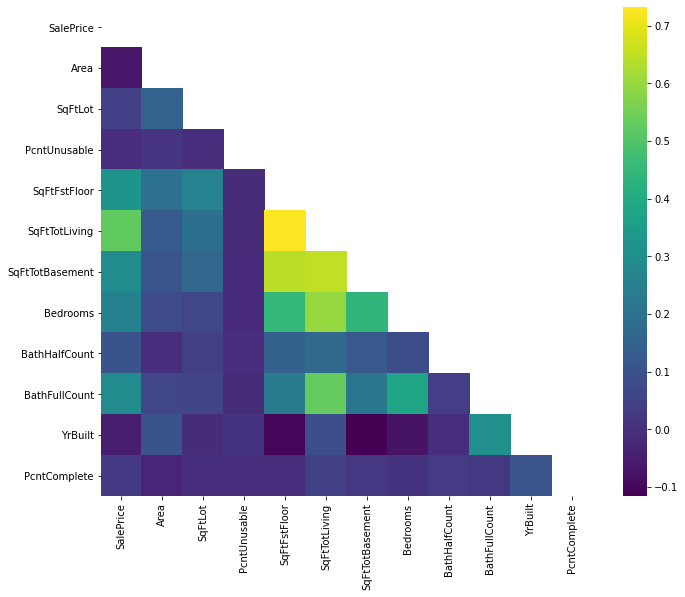

In [20]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

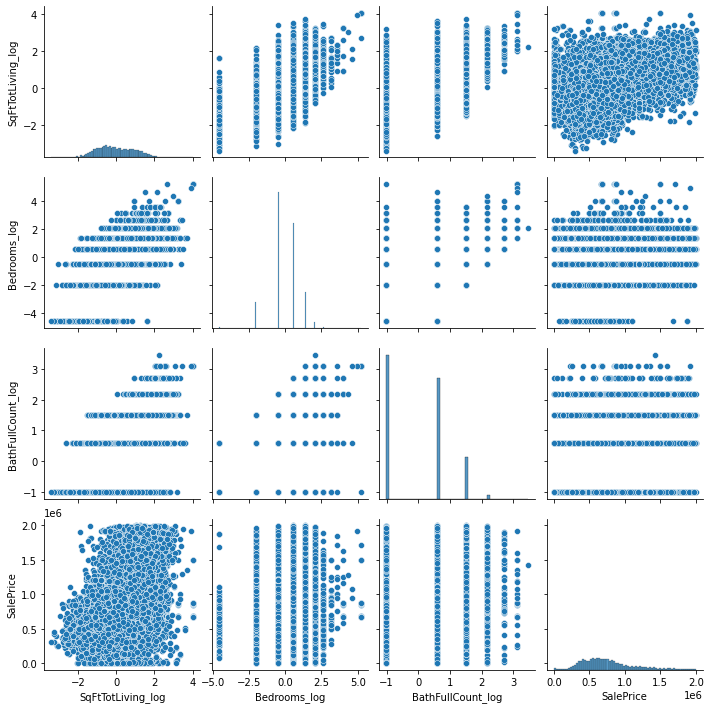

In [35]:
positively_correlated_cols = ['SqFtTotLiving_log', 'Bedrooms_log', 'BathFullCount_log', 'SalePrice']
positively_correlated_df = preprocessed[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [36]:
fsm_df = df[['SqFtTotLiving', 'SalePrice']].copy()
fsm_df.dropna(inplace=True)
fsm = ols(formula="SalePrice ~ SqFtTotLiving", data=fsm_df)
fsm_results = fsm.fit()

In [37]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     9740.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:22:26   Log-Likelihood:            -4.5859e+05
No. Observations:               32389   AIC:                         9.172e+05
Df Residuals:                   32387   BIC:                         9.172e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.358e+05   4753.923     70.645      0.000    3.27e+05    3.45e+05
SqFtTotLiving   175.4171      1.777     98.693      0.000     171.933     178.901
==============================================================================
Omnibus:                     1359.915   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2388.710
Skew:                           0.347   Prob(JB):                         0.00
Kurtosis:                       4.135   Cond. No.                     6.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can only explain about 23% of the variance in SalePrice, with only one feature it is statistically significant with an alpha level of 0.05.

In [38]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0222205301109375
Rainbow p-value: 0.08101052725118604


This high of p-value means that we do not violate linearity assumption

In [39]:
y = fsm_df["SalePrice"]
y_hat = fsm_results.predict()

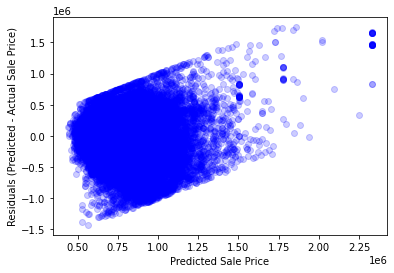

In [40]:
fig4, ax4 = plt.subplots()
ax4.set(xlabel="Predicted Sale Price",
        ylabel="Residuals (Predicted - Actual Sale Price)")
ax4.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);

In [41]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df[["SqFtTotLiving"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


Returning a p-value this low means that this model violates the homoscedasticity assumption

In [42]:
model_2_df = df[['SalePrice', 'SqFtTotLiving', 'BathFullCount']]
model_2_df.dropna(inplace=True)
model_2 = ols(formula="SalePrice ~ SqFtTotLiving + BathFullCount", data=model_2_df)
model_2_results = model_2.fit()

<ipython-input-42-8ea041dd2ebb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_2_df.dropna(inplace=True)


In [43]:
model_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     4886.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:22:37   Log-Likelihood:            -4.5858e+05
No. Observations:               32389   AIC:                         9.172e+05
Df Residuals:                   32386   BIC:                         9.172e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.255e+05   5198.471     62.624      0.000    3.15e+05    3.36e+05
SqFtTotLiving   169.5299      2.147     78.962      0.000     165.322     173.738
BathFullCount  1.448e+04   2964.210      4.884      0.000    8668.695    2.03e+04
==============================================================================
Omnibus:                     1377.303   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2424.598
Skew:                           0.350   Prob(JB):                         0.00
Kurtosis:                       4.143   Cond. No.                     7.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After adding in the second feature we only raised our r-sqaured value from .231 to .232

In [44]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_2_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0226144020859658
Rainbow p-value: 0.07739788595032093


Our p-value went down slightly but we can still assume linearity

Our Jarque-Bera value also rose slightly so the normality is getting worse

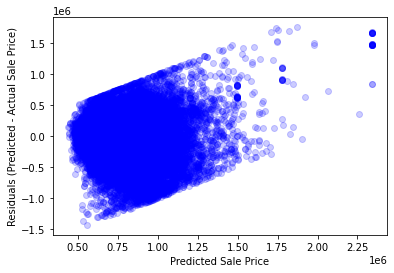

In [45]:
y = model_2_df["SalePrice"]
y_hat = model_2_results.predict()
fig4, ax4 = plt.subplots()
ax4.set(xlabel="Predicted Sale Price",
        ylabel="Residuals (Predicted - Actual Sale Price)")
ax4.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);

Visually we can see almost no improvment. Statistically we see slight improvment with the second variable.

In [46]:
rows = model_2_df[['SqFtTotLiving', 'BathFullCount']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(2)]
vif_df["feature"] = ['SqFtTotLiving', 'BathFullCount']

vif_df

,VIF,feature
0,7.188783,SqFtTotLiving
1,7.188783,BathFullCount


Quite high VIF so we definitely have some multicolinerity already

In [47]:
label_encoder = LabelEncoder()
model_3_df = df[['SalePrice', 'SqFtTotLiving', 'BathFullCount', 'PropertyType']].copy()
model_3_df.dropna(inplace=True)

In [48]:
model_3_df.PropertyType.value_counts()

3     15139
11    12821
2      2323
10     1096
1       451
14      159
0       131
91       87
12       68
5        42
18       20
4        13
13       12
94        9
99        5
96        3
17        1
65        1
22        1
47        1
6         1
83        1
23        1
59        1
33        1
88        1
Name: PropertyType, dtype: int64

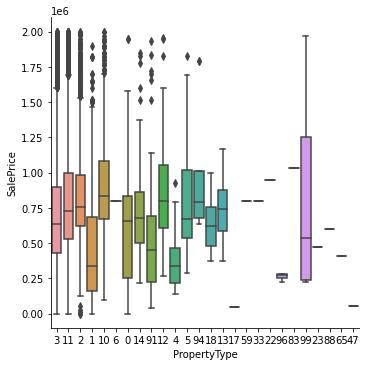

In [49]:
sns.catplot(x="PropertyType", y="SalePrice", data=model_3_df, kind="box");

In [60]:
model_3 = ols(formula="SalePrice ~ SqFtTotLiving + BathFullCount + PropertyType", data=model_3_df)
model_3_results = model_3.fit()

In [61]:
model_3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     451.4
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:29:28   Log-Likelihood:            -4.5767e+05
No. Observations:               32389   AIC:                         9.154e+05
Df Residuals:                   32361   BIC:                         9.156e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.976e+04   2.95e+04      2.366      0.018     1.2e+04    1.28e+05
PropertyType[T.1]  -1.994e+05   3.29e+04     -6.054      0.000   -2.64e+05   -1.35e+05
PropertyType[T.10]   3.38e+05   3.07e+04     11.020      0.000    2.78e+05    3.98e+05
PropertyType[T.11]  2.946e+05   2.91e+04     10.110      0.000    2.38e+05    3.52e+05
PropertyType[T.12]  3.509e+05   4.96e+04      7.074      0.000    2.54e+05    4.48e+05
PropertyType[T.13]  3.053e+05      1e+05      3.051      0.002    1.09e+05    5.01e+05
PropertyType[T.14]  9.177e+04   3.91e+04      2.344      0.019     1.5e+04    1.68e+05
PropertyType[T.17] -5.335e+05   3.33e+05     -1.602      0.109   -1.19e+06    1.19e+05
PropertyType[T.18]  3.127e+05   7.97e+04      3.924      0.000    1.57e+05    4.69e+05
PropertyType[T.2]   3.068e+05   2.98e+04     10.295      0.000    2.48e+05    3.65e+05
PropertyType[T.22]  2.622e+05   3.33e+05      0.787      0.431    -3.9e+05    9.15e+05
PropertyType[T.23]    1.4e+04   3.33e+05      0.042      0.966   -6.39e+05    6.67e+05
PropertyType[T.3]   1.945e+05   2.91e+04      6.681      0.000    1.37e+05    2.52e+05
PropertyType[T.33]  1.794e+05   3.33e+05      0.539      0.590   -4.73e+05    8.32e+05
PropertyType[T.4]  -2.269e+05   9.65e+04     -2.352      0.019   -4.16e+05   -3.78e+04
PropertyType[T.47] -3.733e+05   3.33e+05     -1.121      0.262   -1.03e+06    2.79e+05
PropertyType[T.5]   2.532e+05   5.88e+04      4.305      0.000    1.38e+05    3.69e+05
PropertyType[T.59]  4.027e+05   3.33e+05      1.209      0.227    -2.5e+05    1.06e+06
PropertyType[T.6]   3.685e+05   3.33e+05      1.107      0.268   -2.84e+05    1.02e+06
PropertyType[T.65]  6.512e+04   3.33e+05      0.196      0.845   -5.88e+05    7.18e+05
PropertyType[T.83]  4.097e+05   3.33e+05      1.230      0.219   -2.43e+05    1.06e+06
PropertyType[T.88]   1.41e+05   3.33e+05      0.423      0.672   -5.12e+05    7.94e+05
PropertyType[T.91] -1.423e+05   4.59e+04     -3.101      0.002   -2.32e+05   -5.24e+04
PropertyType[T.94]  3.102e+05   1.14e+05      2.714      0.007    8.62e+04    5.34e+05
PropertyType[T.96]   -1.2e+05   1.94e+05     -0.619      0.536      -5e+05     2.6e+05
PropertyType[T.99]  1.696e+05   1.51e+05      1.122      0.262   -1.27e+05    4.66e+05
SqFtTotLiving        176.7504      2.098     84.257      0.000     172.639     180.862
BathFullCount       1.352e+04   2905.226      4.655      0.000    7828.281    1.92e+04
==============================================================================
Omnibus:                     2049.691   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3490.772
Skew:                           0.495   Prob(JB):                         0.00
Kurtosis:                       4.268   Cond. No.                     

Our r-squared value rose from 0.232 to 0.272. However some of the p-values for the new variables are quite high.

In [52]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_3_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0462994775026329
Rainbow p-value: 0.0019974750075772946


Our p-value got significantly worse and we can no longer assume linearity.

Our JB value also got significantly worse so our normality is also decreasing.

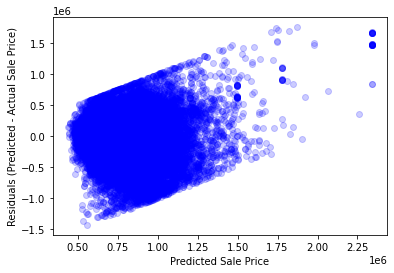

In [53]:
y = model_3_df["SalePrice"]
y_hat = model_2_results.predict()
fig4, ax4 = plt.subplots()
ax4.set(xlabel="Predicted Sale Price",
        ylabel="Residuals (Predicted - Actual Sale Price)")
ax4.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);

Visually we see no change, statiscally our numbers got worse.

Next I want to see if normalizing the data will help with these assumptions.

In [36]:
partial_df = pd.merge(rp_sale, res_bldg, on=['Major', 'Minor'])

I used the code below to figure out which PropertyTypes were residential.

In [39]:
df.PropertyType.value_counts()

3     15139
11    12821
2      2323
10     1096
1       451
14      159
0       131
91       87
12       68
5        42
18       20
4        13
13       12
94        9
99        5
96        3
6         1
83        1
59        1
23        1
65        1
47        1
17        1
88        1
33        1
22        1
Name: PropertyType, dtype: int64

In [38]:
sorted(preprocessed.PropertyType.unique().astype(int))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 10,
 11,
 12,
 13,
 14,
 17,
 18,
 22,
 23,
 33,
 47,
 59,
 65,
 83,
 88,
 91,
 94,
 96,
 99]

In [54]:
parcel.PropType.unique()

array(['R', 'C', 'U', 'T', 'M', 'X', 'K'], dtype=object)

In [16]:
preprocessed.PropertyType.unique()

array(['3', '11', '2', '1', '10', '6', '0', '14', '91', '12', '4', '5',
       '94', '18', '13', '17', '59', '33', '22', '96', '83', '99', '23',
       '88', '65', '47'], dtype=object)

In [42]:
PropertyType_lookup.LUDescription[PropertyType_lookup['LUItem'] == 10]

1    Land with new building                        ...
Name: LUDescription, dtype: object

In [40]:
for i in sorted(preprocessed.PropertyType.unique().astype(int)):
    print(PropertyType_lookup.LUItem[PropertyType_lookup['LUItem'] == i],
          PropertyType_lookup.LUDescription[PropertyType_lookup['LUItem'] == i]
          )

Series([], Name: LUItem, dtype: int64) Series([], Name: LUDescription, dtype: object)
0    1
Name: LUItem, dtype: int64 0    LAND ONLY                                     ...
Name: LUDescription, dtype: object
11    2
Name: LUItem, dtype: int64 11    LAND WITH NEW BUILDING                        ...
Name: LUDescription, dtype: object
21    3
Name: LUItem, dtype: int64 21    LAND WITH PREV USED BLDG                      ...
Name: LUDescription, dtype: object
29    4
Name: LUItem, dtype: int64 29    LAND WITH MOBILE HOME                         ...
Name: LUDescription, dtype: object
39    5
Name: LUItem, dtype: int64 39    TIMBER ONLY                                   ...
Name: LUDescription, dtype: object
50    6
Name: LUItem, dtype: int64 50    BUILDING ONLY                                 ...
Name: LUDescription, dtype: object
1    10
Name: LUItem, dtype: int64 1    Land with new building                        ...
Name: LUDescription, dtype: object
2    11
Name: LUItem, dtype: int64 